In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [ ]:
# dataset from consumption by state by month since 2002 from 2017
data = pd.read_csv('consumption.csv')
data.head()

,Unnamed: 0,Descripción,Unidad,May/2001,Jun/2001,Jul/2001,Ago/2001,Sep/2001,Oct/2001,Nov/2001,Dic/2001,Ene/2002,Feb/2002,Mar/2002,Abr/2002,May/2002,Jun/2002,Jul/2002,Ago/2002,Sep/2002,Oct/2002,Nov/2002,Dic/2002,Ene/2003,Feb/2003,Mar/2003,Abr/2003,May/2003,Jun/2003,Jul/2003,Ago/2003,Sep/2003,Oct/2003,Nov/2003,Dic/2003,Ene/2004,Feb/2004,Mar/2004,Abr/2004,May/2004,...,Sep/2017,Oct/2017,Nov/2017,Dic/2017,Ene/2018,Feb/2018,Mar/2018,Abr/2018,May/2018,Jun/2018,Jul/2018,Ago/2018,Sep/2018,Oct/2018,Nov/2018,Dic/2018,Ene/2019,Feb/2019,Mar/2019,Abr/2019,May/2019,Jun/2019,Jul/2019,Ago/2019,Sep/2019,Oct/2019,Nov/2019,Dic/2019,Ene/2020,Feb/2020,Mar/2020,Abr/2020,May/2020,Jun/2020,Jul/2020,Ago/2020,Sep/2020,Oct/2020,Nov/2020,Dic/2020
0,1,Total Nacional 1,NaN,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,12393.888,12117.075,12248.116,12881.669,13881.910,14167.786,14447.541,14448.652,14351.063,13994.359,12906.507,12363.959,12475.059,12217.127,12897.913,12860.675,13856.702,14170.442,14281.638,14328.738,14122.402,13726.523,13094.646,12352.527,12646.760,12314.965,13137.600,12965.279,13660.419,...,20799.210,18337.435,18244.097,215.310,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,218083.2,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,218929.6,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,97107.7
1,2,Aguascalientes,NaN,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,151.231,140.175,139.327,158.455,174.784,170.128,162.863,144.393,149.626,145.378,146.132,134.511,149.802,144.112,147.981,153.066,172.230,166.519,162.057,142.357,144.865,121.201,147.538,140.664,159.756,142.192,152.356,143.261,167.451,...,261.068,208.852,262.350,2.863,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,2855.5,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,2911.3,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,1302.6
2,3,Baja California,NaN,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,573.853,537.868,540.153,543.137,610.939,666.319,790.528,809.137,793.624,679.316,607.908,524.974,590.960,527.530,562.353,562.022,603.170,693.333,805.939,855.902,850.492,766.754,671.773,559.363,600.340,571.530,610.574,620.646,676.993,...,1186.537,885.113,826.086,10.786,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,10823.8,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,10489.8,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,4469.8
3,4,Baja California Sur,NaN,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,76.944,73.620,72.883,76.134,85.429,91.579,95.786,108.545,109.710,109.593,98.811,82.979,76.985,78.299,75.011,79.643,86.478,93.056,99.294,119.527,110.090,112.421,102.397,92.894,84.350,74.543,100.159,90.415,81.365,...,259.499,224.008,253.241,2.367,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,2561.2,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,2595.9,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,1010.6
4,5,Campeche,NaN,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,52.889,55.632,49.016,56.045,65.181,67.681,65.484,69.705,65.140,64.296,64.644,61.202,57.440,57.135,59.859,62.219,69.405,76.821,75.324,74.123,71.056,79.795,68.060,64.090,59.136,59.996,59.821,71.429,67.679,...,129.360,123.474,112.953,1.340,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,1315.6,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,1388.3,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,N/D,650.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Columns: 239 entries, Unnamed: 0 to Dic/2020
dtypes: float64(196), int64(1), object(42)
memory usage: 61.7+ KB


In [ ]:
data = data.replace('N/D', np.NaN, regex = True)

In [ ]:
data.head()

,Unnamed: 0,Descripción,Unidad,May/2001,Jun/2001,Jul/2001,Ago/2001,Sep/2001,Oct/2001,Nov/2001,Dic/2001,Ene/2002,Feb/2002,Mar/2002,Abr/2002,May/2002,Jun/2002,Jul/2002,Ago/2002,Sep/2002,Oct/2002,Nov/2002,Dic/2002,Ene/2003,Feb/2003,Mar/2003,Abr/2003,May/2003,Jun/2003,Jul/2003,Ago/2003,Sep/2003,Oct/2003,Nov/2003,Dic/2003,Ene/2004,Feb/2004,Mar/2004,Abr/2004,May/2004,...,Sep/2017,Oct/2017,Nov/2017,Dic/2017,Ene/2018,Feb/2018,Mar/2018,Abr/2018,May/2018,Jun/2018,Jul/2018,Ago/2018,Sep/2018,Oct/2018,Nov/2018,Dic/2018,Ene/2019,Feb/2019,Mar/2019,Abr/2019,May/2019,Jun/2019,Jul/2019,Ago/2019,Sep/2019,Oct/2019,Nov/2019,Dic/2019,Ene/2020,Feb/2020,Mar/2020,Abr/2020,May/2020,Jun/2020,Jul/2020,Ago/2020,Sep/2020,Oct/2020,Nov/2020,Dic/2020
0,1,Total Nacional 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12393.888,12117.075,12248.116,12881.669,13881.910,14167.786,14447.541,14448.652,14351.063,13994.359,12906.507,12363.959,12475.059,12217.127,12897.913,12860.675,13856.702,14170.442,14281.638,14328.738,14122.402,13726.523,13094.646,12352.527,12646.760,12314.965,13137.600,12965.279,13660.419,...,20799.210,18337.435,18244.097,215.310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218083.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218929.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97107.7
1,2,Aguascalientes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151.231,140.175,139.327,158.455,174.784,170.128,162.863,144.393,149.626,145.378,146.132,134.511,149.802,144.112,147.981,153.066,172.230,166.519,162.057,142.357,144.865,121.201,147.538,140.664,159.756,142.192,152.356,143.261,167.451,...,261.068,208.852,262.350,2.863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2855.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2911.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1302.6
2,3,Baja California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,573.853,537.868,540.153,543.137,610.939,666.319,790.528,809.137,793.624,679.316,607.908,524.974,590.960,527.530,562.353,562.022,603.170,693.333,805.939,855.902,850.492,766.754,671.773,559.363,600.340,571.530,610.574,620.646,676.993,...,1186.537,885.113,826.086,10.786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10823.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10489.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4469.8
3,4,Baja California Sur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.944,73.620,72.883,76.134,85.429,91.579,95.786,108.545,109.710,109.593,98.811,82.979,76.985,78.299,75.011,79.643,86.478,93.056,99.294,119.527,110.090,112.421,102.397,92.894,84.350,74.543,100.159,90.415,81.365,...,259.499,224.008,253.241,2.367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2561.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2595.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1010.6
4,5,Campeche,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.889,55.632,49.016,56.045,65.181,67.681,65.484,69.705,65.140,64.296,64.644,61.202,57.440,57.135,59.859,62.219,69.405,76.821,75.324,74.123,71.056,79.795,68.060,64.090,59.136,59.996,59.821,71.429,67.679,...,129.360,123.474,112.953,1.340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1315.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1388.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,650.0


In [ ]:
data = data.dropna(axis=1)

In [ ]:
data = data.drop(columns='Unnamed: 0', axis = 0)
data.head()

,Descripción,Ene/2002,Feb/2002,Mar/2002,Abr/2002,May/2002,Jun/2002,Jul/2002,Ago/2002,Sep/2002,Oct/2002,Nov/2002,Dic/2002,Ene/2003,Feb/2003,Mar/2003,Abr/2003,May/2003,Jun/2003,Jul/2003,Ago/2003,Sep/2003,Oct/2003,Nov/2003,Dic/2003,Ene/2004,Feb/2004,Mar/2004,Abr/2004,May/2004,Jun/2004,Jul/2004,Ago/2004,Sep/2004,Oct/2004,Nov/2004,Dic/2004,Ene/2005,Feb/2005,Mar/2005,...,Dic/2014,Ene/2015,Feb/2015,Mar/2015,Abr/2015,May/2015,Jun/2015,Jul/2015,Ago/2015,Sep/2015,Oct/2015,Nov/2015,Dic/2015,Ene/2016,Feb/2016,Mar/2016,Abr/2016,May/2016,Jun/2016,Jul/2016,Ago/2016,Sep/2016,Oct/2016,Nov/2016,Dic/2016,Ene/2017,Feb/2017,Mar/2017,Abr/2017,May/2017,Jun/2017,Jul/2017,Ago/2017,Sep/2017,Oct/2017,Nov/2017,Dic/2017,Dic/2018,Dic/2019,Dic/2020
0,Total Nacional 1,12393.888,12117.075,12248.116,12881.669,13881.910,14167.786,14447.541,14448.652,14351.063,13994.359,12906.507,12363.959,12475.059,12217.127,12897.913,12860.675,13856.702,14170.442,14281.638,14328.738,14122.402,13726.523,13094.646,12352.527,12646.760,12314.965,13137.600,12965.279,13660.419,14194.206,14548.834,14828.088,14688.086,14360.555,13393.343,12771.128,12798.679,12538.889,12947.065,...,208.015,15733.183,15446.116,16670.678,16906.989,17879.130,18533.579,19096.085,20027.459,19737.919,19048.162,17259.195,212.201,15719.097,15903.360,16540.913,17723.148,18874.169,19647.932,20194.861,20368.075,19746.647,19232.379,17757.131,218.072,15879.622,15618.755,16721.993,17029.084,18566.216,19546.784,19705.310,19665.722,20799.210,18337.435,18244.097,215.310,218083.2,218929.6,97107.7
1,Aguascalientes,151.231,140.175,139.327,158.455,174.784,170.128,162.863,144.393,149.626,145.378,146.132,134.511,149.802,144.112,147.981,153.066,172.230,166.519,162.057,142.357,144.865,121.201,147.538,140.664,159.756,142.192,152.356,143.261,167.451,155.954,148.467,151.255,153.032,148.172,156.153,148.000,161.441,152.864,151.131,...,2.629,222.551,209.715,217.738,217.369,248.225,240.941,226.341,232.597,235.972,230.516,218.664,2.709,216.419,206.022,215.442,233.767,253.459,249.729,244.353,230.634,223.209,233.276,233.795,2.752,225.869,218.605,240.532,236.579,258.032,258.575,260.455,234.085,261.068,208.852,262.350,2.863,2855.5,2911.3,1302.6
2,Baja California,573.853,537.868,540.153,543.137,610.939,666.319,790.528,809.137,793.624,679.316,607.908,524.974,590.960,527.530,562.353,562.022,603.170,693.333,805.939,855.902,850.492,766.754,671.773,559.363,600.340,571.530,610.574,620.646,676.993,735.407,823.168,907.603,861.485,747.307,650.290,585.188,617.641,559.917,610.427,...,9.816,675.673,654.324,690.843,722.805,746.077,802.512,1017.230,1096.290,1131.053,1013.306,813.613,10.012,698.771,681.604,708.087,738.505,767.300,929.026,1106.007,1194.916,1128.043,934.059,842.658,10.458,729.503,703.682,766.812,787.010,816.538,917.802,1132.115,1187.263,1186.537,885.113,826.086,10.786,10823.8,10489.8,4469.8
3,Baja California Sur,76.944,73.620,72.883,76.134,85.429,91.579,95.786,108.545,109.710,109.593,98.811,82.979,76.985,78.299,75.011,79.643,86.478,93.056,99.294,119.527,110.090,112.421,102.397,92.894,84.350,74.543,100.159,90.415,81.365,94.532,113.898,125.899,123.011,117.329,107.259,97.651,86.473,81.633,84.653,...,2.116,143.605,134.620,141.220,150.555,165.794,171.688,207.488,231.361,237.622,233.776,211.081,2.202,157.398,148.818,157.655,161.099,175.817,188.541,221.974,235.949,231.472,237.261,231.940,2.343,164.554,152.716,162.198,166.179,178.739,185.223,219.764,248.762,259.499,224.008,253.241,2.367,2561.2,2595.9,1010.6
4,Campeche,52.889,55.632,49.016,56.045,65.181,67.681,65.484,69.705,65.140,64.296,64.644,61.202,57.440,57.135,59.859,62.219,69.405,76.821,75.324,74.123,71.056,79.795,68.060,64.090,59.136,59.996,59.821,71.429,67.679,76.824,75.476,83.290,73.422,82.143,69.855,67.118,59.942,64.081,59.947,...,1.299,91.771,86.628,94.075,108.788,123.020,122.854,123.381,123.756,124.803,121.829,115.606,1.341,99.072,89.119,92.073,107.043,126.744,139.145,135.009,123.465,129.107,117.989,116.672,1.388,98.896,90.817,102.390,108.189,118.410,124.149,125.448,118.315,129.360,123.

In [ ]:
data = data.iloc[1:, : ]

In [ ]:
data.head()

,Descripción,Ene/2002,Feb/2002,Mar/2002,Abr/2002,May/2002,Jun/2002,Jul/2002,Ago/2002,Sep/2002,Oct/2002,Nov/2002,Dic/2002,Ene/2003,Feb/2003,Mar/2003,Abr/2003,May/2003,Jun/2003,Jul/2003,Ago/2003,Sep/2003,Oct/2003,Nov/2003,Dic/2003,Ene/2004,Feb/2004,Mar/2004,Abr/2004,May/2004,Jun/2004,Jul/2004,Ago/2004,Sep/2004,Oct/2004,Nov/2004,Dic/2004,Ene/2005,Feb/2005,Mar/2005,...,Dic/2014,Ene/2015,Feb/2015,Mar/2015,Abr/2015,May/2015,Jun/2015,Jul/2015,Ago/2015,Sep/2015,Oct/2015,Nov/2015,Dic/2015,Ene/2016,Feb/2016,Mar/2016,Abr/2016,May/2016,Jun/2016,Jul/2016,Ago/2016,Sep/2016,Oct/2016,Nov/2016,Dic/2016,Ene/2017,Feb/2017,Mar/2017,Abr/2017,May/2017,Jun/2017,Jul/2017,Ago/2017,Sep/2017,Oct/2017,Nov/2017,Dic/2017,Dic/2018,Dic/2019,Dic/2020
1,Aguascalientes,151.231,140.175,139.327,158.455,174.784,170.128,162.863,144.393,149.626,145.378,146.132,134.511,149.802,144.112,147.981,153.066,172.230,166.519,162.057,142.357,144.865,121.201,147.538,140.664,159.756,142.192,152.356,143.261,167.451,155.954,148.467,151.255,153.032,148.172,156.153,148.000,161.441,152.864,151.131,...,2.629,222.551,209.715,217.738,217.369,248.225,240.941,226.341,232.597,235.972,230.516,218.664,2.709,216.419,206.022,215.442,233.767,253.459,249.729,244.353,230.634,223.209,233.276,233.795,2.752,225.869,218.605,240.532,236.579,258.032,258.575,260.455,234.085,261.068,208.852,262.350,2.863,2855.5,2911.3,1302.6
2,Baja California,573.853,537.868,540.153,543.137,610.939,666.319,790.528,809.137,793.624,679.316,607.908,524.974,590.960,527.530,562.353,562.022,603.170,693.333,805.939,855.902,850.492,766.754,671.773,559.363,600.340,571.530,610.574,620.646,676.993,735.407,823.168,907.603,861.485,747.307,650.290,585.188,617.641,559.917,610.427,...,9.816,675.673,654.324,690.843,722.805,746.077,802.512,1017.230,1096.290,1131.053,1013.306,813.613,10.012,698.771,681.604,708.087,738.505,767.300,929.026,1106.007,1194.916,1128.043,934.059,842.658,10.458,729.503,703.682,766.812,787.010,816.538,917.802,1132.115,1187.263,1186.537,885.113,826.086,10.786,10823.8,10489.8,4469.8
3,Baja California Sur,76.944,73.620,72.883,76.134,85.429,91.579,95.786,108.545,109.710,109.593,98.811,82.979,76.985,78.299,75.011,79.643,86.478,93.056,99.294,119.527,110.090,112.421,102.397,92.894,84.350,74.543,100.159,90.415,81.365,94.532,113.898,125.899,123.011,117.329,107.259,97.651,86.473,81.633,84.653,...,2.116,143.605,134.620,141.220,150.555,165.794,171.688,207.488,231.361,237.622,233.776,211.081,2.202,157.398,148.818,157.655,161.099,175.817,188.541,221.974,235.949,231.472,237.261,231.940,2.343,164.554,152.716,162.198,166.179,178.739,185.223,219.764,248.762,259.499,224.008,253.241,2.367,2561.2,2595.9,1010.6
4,Campeche,52.889,55.632,49.016,56.045,65.181,67.681,65.484,69.705,65.140,64.296,64.644,61.202,57.440,57.135,59.859,62.219,69.405,76.821,75.324,74.123,71.056,79.795,68.060,64.090,59.136,59.996,59.821,71.429,67.679,76.824,75.476,83.290,73.422,82.143,69.855,67.118,59.942,64.081,59.947,...,1.299,91.771,86.628,94.075,108.788,123.020,122.854,123.381,123.756,124.803,121.829,115.606,1.341,99.072,89.119,92.073,107.043,126.744,139.145,135.009,123.465,129.107,117.989,116.672,1.388,98.896,90.817,102.390,108.189,118.410,124.149,125.448,118.315,129.360,123.474,112.953,1.340,1315.6,1388.3,650.0
5,Coahuila,688.749,648.625,682.932,675.506,798.494,803.173,840.344,821.718,814.343,789.275,728.557,666.101,699.406,663.304,716.165,655.872,752.669,782.255,810.202,804.209,753.492,735.798,701.458,666.521,692.167,646.698,725.593,670.019,634.783,696.198,721.874,755.944,736.320,715.422,641.082,592.260,599.476,574.916,616.679,...,10.552,760.278,771.804,966.137,848.602,859.019,915.784,947.299,964.464,972.943,949.978,792.465,10.463,712.509,725.274,798.201,795.032,864.775,951.470,984.794,976.560,988.100,892.983,797.086,10.212,755.076,745.102,748.846,776.702,892.423,955.522,983.204,1006.823,1070.001,882.212,813.481,10.393,10601.9,10920.2,4512.5


In [ ]:
data = pd.melt(data, id_vars='Descripción')
data.head()

,Descripción,variable,value
0,Aguascalientes,Ene/2002,151.231
1,Baja California,Ene/2002,573.853
2,Baja California Sur,Ene/2002,76.944
3,Campeche,Ene/2002,52.889
4,Coahuila,Ene/2002,688.749


In [ ]:
data = data.replace('Ene', '01', regex = True)
data = data.replace('Feb', '02', regex = True)
data = data.replace('Mar', '03', regex = True)
data = data.replace('Abr', '04', regex = True)
data = data.replace('May', '05', regex = True)
data = data.replace('Jun', '06', regex = True)
data = data.replace('Jul', '07', regex = True)
data = data.replace('Ago', '08', regex = True)
data = data.replace('Sep', '09', regex = True)
data = data.replace('Oct', '10', regex = True)
data = data.replace('Nov', '11', regex = True)
data = data.replace('Dic', '12', regex = True)

In [ ]:
data['variable'] = pd.to_datetime(data['variable'], infer_datetime_format=False)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6240 entries, 0 to 6239
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Descripción  6240 non-null   object        
 1   variable     6240 non-null   datetime64[ns]
 2   value        6240 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 146.4+ KB


In [ ]:
data.head()

,Descripción,variable,value
0,Aguascalientes,2002-01-01,151.231
1,Baja California,2002-01-01,573.853
2,Baja California Sur,2002-01-01,76.944
3,Campeche,2002-01-01,52.889
4,Coahuila,2002-01-01,688.749


In [ ]:
ags = data[data['Descripción'] == 'Aguascalientes']

In [ ]:
ags.head()

,Descripción,variable,value
0,Aguascalientes,2002-01-01,151.231
32,Aguascalientes,2002-02-01,140.175
64,Aguascalientes,2002-03-01,139.327
96,Aguascalientes,2002-04-01,158.455
128,Aguascalientes,2002-05-01,174.784


In [ ]:
ags = ags.drop(columns = 'Descripción')

In [ ]:
index_ags = ags.set_index(['variable'])

In [117]:
index_ags.head()

,value
variable,
2002-01-01,151.231
2002-02-01,140.175
2002-03-01,139.327
2002-04-01,158.455
2002-05-01,174.784


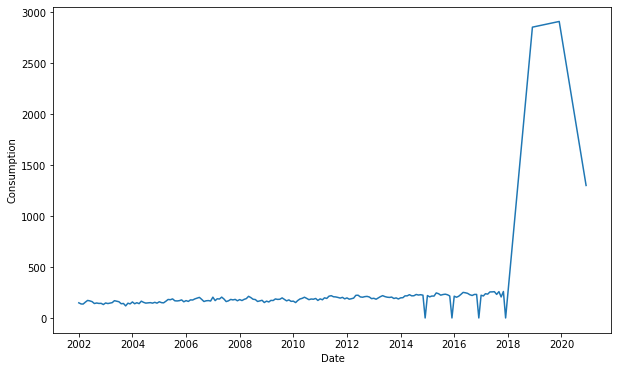

In [118]:
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.plot(index_ags)